# Social Media Impact on Young Female Mental Health

In [1]:
#Loading packages
import seaborn as sns
sns.set(style="whitegrid", palette="pastel")
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing csv dataset
df= pd.read_csv('smmh.csv')

We will start by looking at our data.

In [3]:
#Checking the datype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

## Data Cleaning

Renaming columns to facilitate analysis

In [4]:
#Renaming the columns
df = df.rename(columns={'1. What is your age?':'Age', '2. Gender':'Gender', '3. Relationship Status': 'Relationship status', '4. Occupation Status': 'Occupation', '5. What type of organizations are you affiliated with?':'Organizations', '6. Do you use social media?':'Do you use social media?', '7. What social media platforms do you commonly use?': 'Social media platform', '8. What is the average time you spend on social media every day?':'Time on social media', '9. How often do you find yourself using Social media without a specific purpose?':'Using social media without a purpose', '10. How often do you get distracted by Social media when you are busy doing something?' : 'Distracted by social media', "11. Do you feel restless if you haven't used Social media in a while?": 'Restless without social media','12. On a scale of 1 to 5, how easily distracted are you?': 'Easily distracted', '13. On a scale of 1 to 5, how much are you bothered by worries?':'Bothered by worries', '14. Do you find it difficult to concentrate on things?': 'Difficult to concentrate', '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?' : 'Comparing yourself in social media', '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'General comparisons', '17. How often do you look to seek validation from features of social media?':'Seeking validation through social media', '18. How often do you feel depressed or down?':'Depressed or down', '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'Interest change in daily activities', '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Sleep issues'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Timestamp                                481 non-null    object 
 1   Age                                      481 non-null    float64
 2   Gender                                   481 non-null    object 
 3   Relationship status                      481 non-null    object 
 4   Occupation                               481 non-null    object 
 5   Organizations                            451 non-null    object 
 6   Do you use social media?                 481 non-null    object 
 7   Social media platform                    481 non-null    object 
 8   Time on social media                     481 non-null    object 
 9   Using social media without a purpose     481 non-null    int64  
 10  Distracted by social media               481 non-n

In [5]:
#Checking the head of the columns
df.head()

,Timestamp,Age,Gender,Relationship status,Occupation,Organizations,Do you use social media?,Social media platform,Time on social media,Using social media without a purpose,...,Restless without social media,Easily distracted,Bothered by worries,Difficult to concentrate,Comparing yourself in social media,General comparisons,Seeking validation through social media,Depressed or down,Interest change in daily activities,Sleep issues
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [6]:
#Creating a copy of the dataset
df_clean = df.copy()
#Confirming the copy was created
df_clean.head(5)

,Timestamp,Age,Gender,Relationship status,Occupation,Organizations,Do you use social media?,Social media platform,Time on social media,Using social media without a purpose,...,Restless without social media,Easily distracted,Bothered by worries,Difficult to concentrate,Comparing yourself in social media,General comparisons,Seeking validation through social media,Depressed or down,Interest change in daily activities,Sleep issues
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


Looking for missing values

In [7]:
#Calculating the percentage of missing values
missing = df_clean.isnull().sum().sort_values(ascending=False)/len(df_clean)*100
missing

Organizations                              6.237006
Timestamp                                  0.000000
Restless without social media              0.000000
Interest change in daily activities        0.000000
Depressed or down                          0.000000
Seeking validation through social media    0.000000
General comparisons                        0.000000
Comparing yourself in social media         0.000000
Difficult to concentrate                   0.000000
Bothered by worries                        0.000000
Easily distracted                          0.000000
Distracted by social media                 0.000000
Age                                        0.000000
Using social media without a purpose       0.000000
Time on social media                       0.000000
Social media platform                      0.000000
Do you use social media?                   0.000000
Occupation                                 0.000000
Relationship status                        0.000000
Gender      

We will split column "7. What social media platforms do you commonly use" based on the commas for our analysis.

In [8]:
#Creating a dataframe with the split data
data = {
    '7. What social media platforms do you commonly use?': [
        'Facebook, Instagram, Twitter',
        'Instagram, Youtube',
        'Twitter, Snapchat, TikTok',
        'Reddit, Facebook'
    ]
}

df_split = pd.DataFrame(data)

# Spliting column '7. What social media platforms do you commonly use?' into multiple columns based on commas
all_platforms = df_split['7. What social media platforms do you commonly use?'].astype(str).str.split(',', expand=True)

# Define the list of possible social media platforms
platforms = ['Facebook', 'Twitter', 'Instagram', 'Youtube', 'Snapchat', 'Discord', 'Reddit', 'Pinterest', 'TikTok']

# Create a column for each platform and set 1 if that platform is in the response
for platform in platforms:
    df_split[platform] = df_split['7. What social media platforms do you commonly use?'].apply(lambda x: 1 if platform in x else 0)

#Printing the results
df_split


,7. What social media platforms do you commonly use?,Facebook,Twitter,Instagram,Youtube,Snapchat,Discord,Reddit,Pinterest,TikTok
0,"Facebook, Instagram, Twitter",1,1,1,0,0,0,0,0,0
1,"Instagram, Youtube",0,0,1,1,0,0,0,0,0
2,"Twitter, Snapchat, TikTok",0,1,0,0,1,0,0,0,1
3,"Reddit, Facebook",1,0,0,0,0,0,1,0,0


Now that the data is splitted by the social media, we will proceed to rename the columns.

In [9]:
#Renaming the social media columns
df_split = df_split.rename(columns={'Facebook':'Social Media 1', 'Twitter': 'Social Media 2', 'Instagram':'Social Media 3', 'Youtube':'Social Media 4', 'Snapchat': 'Social Media 5', 'Discord': 'Social Media 6', 'Reddit':'Social Media 7', 'Pinterest':'Social Media 8', 'TikTok':'Social Media 9'})
#Removing column '7. What social media platforms do you commonly use?'
df_split = df_split.drop(columns=['7. What social media platforms do you commonly use?'])
df_split.head(5)

,Social Media 1,Social Media 2,Social Media 3,Social Media 4,Social Media 5,Social Media 6,Social Media 7,Social Media 8,Social Media 9
0,1,1,1,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1
3,1,0,0,0,0,0,1,0,0


Now we will proceed to merge our "df_split" columns to our dataset "df_clean".

In [10]:
df_clean = pd.concat([df, df_split], axis=1)
df_clean

,Timestamp,Age,Gender,Relationship status,Occupation,Organizations,Do you use social media?,Social media platform,Time on social media,Using social media without a purpose,...,Sleep issues,Social Media 1,Social Media 2,Social Media 3,Social Media 4,Social Media 5,Social Media 6,Social Media 7,Social Media 8,Social Media 9
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since there weren't missing values from column question 7, and we introduce missing values by splitting that column, we will proceed to replace NaN with 0.

In [11]:
#Fill Nan values with 0
df_clean[['Social Media 1','Social Media 2','Social Media 3','Social Media 4','Social Media 5','Social Media 6', 'Social Media 7', 'Social Media 8', 'Social Media 9']] = df_clean[['Social Media 1','Social Media 2','Social Media 3','Social Media 4','Social Media 5','Social Media 6', 'Social Media 7', 'Social Media 8', 'Social Media 9']].fillna(0)

### We will now look at missing values in our data.

In [12]:
#Calculating the percentage of missing values
missing = df_clean.isnull().sum().sort_values(ascending=False)/len(df_clean)*100
missing

Organizations                              6.237006
Timestamp                                  0.000000
General comparisons                        0.000000
Social Media 8                             0.000000
Social Media 7                             0.000000
Social Media 6                             0.000000
Social Media 5                             0.000000
Social Media 4                             0.000000
Social Media 3                             0.000000
Social Media 2                             0.000000
Social Media 1                             0.000000
Sleep issues                               0.000000
Interest change in daily activities        0.000000
Depressed or down                          0.000000
Seeking validation through social media    0.000000
Comparing yourself in social media         0.000000
Age                                        0.000000
Difficult to concentrate                   0.000000
Bothered by worries                        0.000000
Easily distr

There is some missing data in the Organizations column, since that column is similar to Ocupation we decided to remove it. And we will proceed to remove unnecesary columns like Timestamp, and Social media platform

In [13]:
#Droping columns that are not needed
df_clean = df_clean.drop(columns=['Timestamp', 'Organizations','Social media platform'])
df_clean.head(5)


,Age,Gender,Relationship status,Occupation,Do you use social media?,Time on social media,Using social media without a purpose,Distracted by social media,Restless without social media,Easily distracted,...,Sleep issues,Social Media 1,Social Media 2,Social Media 3,Social Media 4,Social Media 5,Social Media 6,Social Media 7,Social Media 8,Social Media 9
0,21.0,Male,In a relationship,University Student,Yes,Between 2 and 3 hours,5,3,2,5,...,5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21.0,Female,Single,University Student,Yes,More than 5 hours,4,3,2,4,...,5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,21.0,Female,Single,University Student,Yes,Between 3 and 4 hours,3,2,1,2,...,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,21.0,Female,Single,University Student,Yes,More than 5 hours,4,2,1,3,...,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,21.0,Female,Single,University Student,Yes,Between 2 and 3 hours,3,5,4,4,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will now look at describe() so we can have an idea if there are any outliers in the dataset.

In [14]:
#Describing the data
df.describe()

,Age,Using social media without a purpose,Distracted by social media,Restless without social media,Easily distracted,Bothered by worries,Difficult to concentrate,Comparing yourself in social media,General comparisons,Seeking validation through social media,Depressed or down,Interest change in daily activities,Sleep issues
count,481.00000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.13659,3.553015,3.320166,2.588358,3.349272,3.559252,3.245322,2.831601,2.775468,2.455301,3.255717,3.170478,3.201663
std,9.91511,1.096299,1.328137,1.257059,1.175552,1.283356,1.347105,1.407835,1.056479,1.247739,1.313033,1.256666,1.461619
min,13.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.00000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.00000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.00000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


We will proceed to transform to create a "Social Media Count" column.

In [15]:
#Creating a total social media count column by summing the social media columns
df_clean['Social Media Count']= df_clean['Social Media 1'] + df_clean['Social Media 2'] + df_clean['Social Media 3'] + df_clean['Social Media 4'] + df_clean['Social Media 5'] + df_clean['Social Media 6'] + df_clean['Social Media 7'] + df_clean['Social Media 8'] + df_clean['Social Media 9']

df_clean.head(5)

,Age,Gender,Relationship status,Occupation,Do you use social media?,Time on social media,Using social media without a purpose,Distracted by social media,Restless without social media,Easily distracted,...,Social Media 1,Social Media 2,Social Media 3,Social Media 4,Social Media 5,Social Media 6,Social Media 7,Social Media 8,Social Media 9,Social Media Count
0,21.0,Male,In a relationship,University Student,Yes,Between 2 and 3 hours,5,3,2,5,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,21.0,Female,Single,University Student,Yes,More than 5 hours,4,3,2,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,21.0,Female,Single,University Student,Yes,Between 3 and 4 hours,3,2,1,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
3,21.0,Female,Single,University Student,Yes,More than 5 hours,4,2,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,21.0,Female,Single,University Student,Yes,Between 2 and 3 hours,3,5,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will group the non binary, unsure and there are others as 'others' since we are just interested to know data between male and female for this study.

In [16]:
# Grouping non-binary, others, unsure into one category called 'Others'
df_clean['Gender'] = df_clean['Gender'].replace({'Nonbinary ':'Others', 'Non binary ':'Others', 'There are others???':'Others', 'Non-binary':'Others', 'unsure ':'Others', 'NB':'Others', 'Trans':'Others'})
df_clean.head(5)

,Age,Gender,Relationship status,Occupation,Do you use social media?,Time on social media,Using social media without a purpose,Distracted by social media,Restless without social media,Easily distracted,...,Social Media 1,Social Media 2,Social Media 3,Social Media 4,Social Media 5,Social Media 6,Social Media 7,Social Media 8,Social Media 9,Social Media Count
0,21.0,Male,In a relationship,University Student,Yes,Between 2 and 3 hours,5,3,2,5,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,21.0,Female,Single,University Student,Yes,More than 5 hours,4,3,2,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,21.0,Female,Single,University Student,Yes,Between 3 and 4 hours,3,2,1,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
3,21.0,Female,Single,University Student,Yes,More than 5 hours,4,2,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,21.0,Female,Single,University Student,Yes,Between 2 and 3 hours,3,5,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will proceed to filter our data for young females (18-29).

In [17]:
young_females = df_clean[(df_clean['Age']>=18) & (df_clean['Age']<=29) & (df_clean['Gender']=='Female')]
young_females.head(5)

,Age,Gender,Relationship status,Occupation,Do you use social media?,Time on social media,Using social media without a purpose,Distracted by social media,Restless without social media,Easily distracted,...,Social Media 1,Social Media 2,Social Media 3,Social Media 4,Social Media 5,Social Media 6,Social Media 7,Social Media 8,Social Media 9,Social Media Count
1,21.0,Female,Single,University Student,Yes,More than 5 hours,4,3,2,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,21.0,Female,Single,University Student,Yes,Between 3 and 4 hours,3,2,1,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
3,21.0,Female,Single,University Student,Yes,More than 5 hours,4,2,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,21.0,Female,Single,University Student,Yes,Between 2 and 3 hours,3,5,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,22.0,Female,Single,University Student,Yes,Between 2 and 3 hours,4,4,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Checking the data shape to ensure the data was filtered correctly
young_females.shape

(218, 28)

We will create a young_females_depressed dataframe so we can create different analysis charts.

In [19]:
#Creating a dataframe with depressed young females.
young_females_depressed = young_females[young_females['Depressed or down'] >= 3]
young_females_depressed

,Age,Gender,Relationship status,Occupation,Do you use social media?,Time on social media,Using social media without a purpose,Distracted by social media,Restless without social media,Easily distracted,...,Social Media 1,Social Media 2,Social Media 3,Social Media 4,Social Media 5,Social Media 6,Social Media 7,Social Media 8,Social Media 9,Social Media Count
1,21.0,Female,Single,University Student,Yes,More than 5 hours,4,3,2,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,21.0,Female,Single,University Student,Yes,Between 3 and 4 hours,3,2,1,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
3,21.0,Female,Single,University Student,Yes,More than 5 hours,4,2,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,21.0,Female,Single,University Student,Yes,Between 2 and 3 hours,3,5,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,22.0,Female,Single,University Student,Yes,Between 2 and 3 hours,4,4,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,28.0,Female,Married,Salaried Worker,Yes,Between 2 and 3 hours,5,4,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470,20.0,Female,Single,University Student,Yes,Between 1 and 2 hours,2,2,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
471,20.0,Female,Single,University Student,Yes,More than 5 hours,5,4,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
473,26.0,Female,Married,University Student,Yes,Between 2 and 3 hours,4,4,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will keep young_females dataframe as a categorical dataset and we will transform to numerical, and be called young_females_numerical dataframe so we can create different analysis charts.

In [20]:
young_females_numerical = young_females.copy()

In [21]:
#Converting categorical data to numerical data.
young_females_numerical['Time on social media'] = df_clean['Time on social media'].replace({'Less than an Hour':0, 'Between 1 and 2 hours':1, 'Between 2 and 3 hours':2, 'Between 3 and 4 hours':3, 'Between 4 and 5 hours':4, 'More than 5 hours':5})
young_females_numerical['Do you use social media?'] = df_clean['Do you use social media?'].replace({'Yes':1,})
young_females_numerical['Occupation'] = df_clean['Occupation'].replace({'School student':0, 'School Student':0, 'University Student':1, 'Salaried Worker':2, 'Retired':3 })
young_females_numerical['Relationship status'] = df_clean['Relationship status'].replace({'Single':0, 'In a relationship':1, 'Married':2, 'Divorced':3 })
young_females_numerical['Gender'] = df_clean['Gender'].replace({'Male':0, 'Female':1 })
young_females_numerical.head(5)


,Age,Gender,Relationship status,Occupation,Do you use social media?,Time on social media,Using social media without a purpose,Distracted by social media,Restless without social media,Easily distracted,...,Social Media 1,Social Media 2,Social Media 3,Social Media 4,Social Media 5,Social Media 6,Social Media 7,Social Media 8,Social Media 9,Social Media Count
1,21.0,1,0,1,1,5,4,3,2,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,21.0,1,0,1,1,3,3,2,1,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
3,21.0,1,0,1,1,5,4,2,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,21.0,1,0,1,1,2,3,5,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,22.0,1,0,1,1,2,4,4,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will create a two dataframes from mental_health_columns and social_media_columns, and then get the statistics 

In [22]:
# Summary statistics for mental health variables
mental_health_columns = ['Depressed or down', 'Easily distracted', 'Bothered by worries', 'Difficult to concentrate', 'Interest change in daily activities', 'Sleep issues']
social_media_columns = ['Using social media without a purpose','Time on social media', 'Distracted by social media', 'Restless without social media', 'Seeking validation through social media']
# Calculate mean, median, and standard deviation for mental health and social media usage
mental_health_stats = young_females_numerical[mental_health_columns].describe()
social_media_stats = young_females_numerical[social_media_columns].describe()
print("Mental Health Statistics:\n", mental_health_stats)
print("Social Media Usage Statistics:\n", social_media_stats)


Mental Health Statistics:
        Depressed or down  Easily distracted  Bothered by worries  \
count         218.000000         218.000000           218.000000   
mean            3.573394           3.559633             3.853211   
std             1.197782           1.114886             1.142603   
min             1.000000           1.000000             1.000000   
25%             3.000000           3.000000             3.000000   
50%             4.000000           4.000000             4.000000   
75%             5.000000           4.000000             5.000000   
max             5.000000           5.000000             5.000000   

       Difficult to concentrate  Interest change in daily activities  \
count                218.000000                           218.000000   
mean                   3.472477                             3.463303   
std                    1.222551                             1.164384   
min                    1.000000                             1.000000   


We will proceed to create a correlation matrix, to have an insight on the dataset.

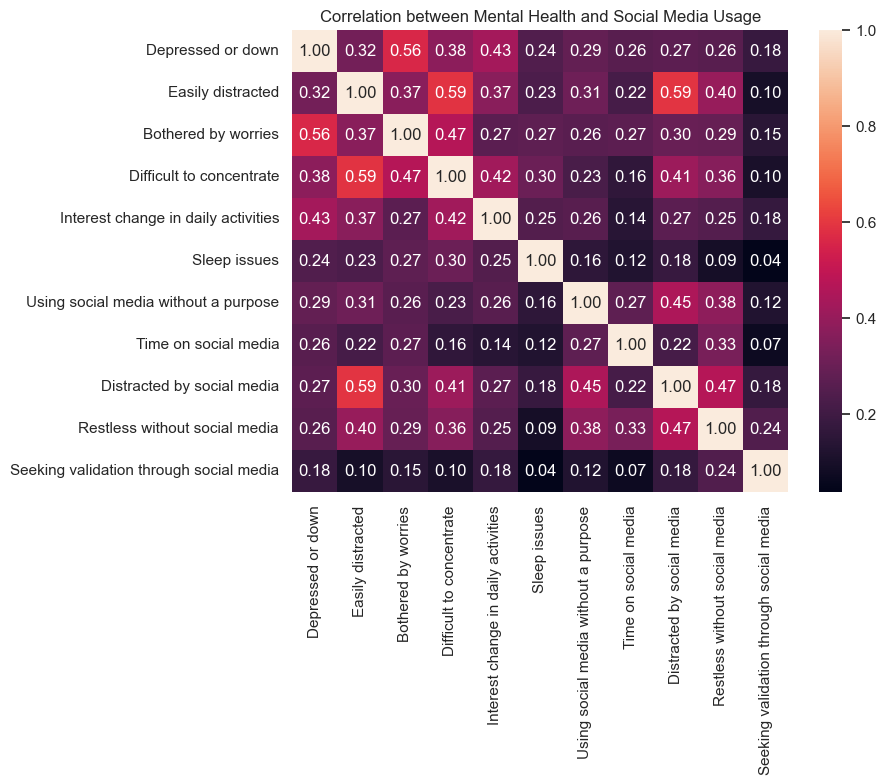

In [23]:
# Correlation between mental health and social media variables
correlation_matrix = young_females_numerical[mental_health_columns + social_media_columns].corr()
# Display correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation between Mental Health and Social Media Usage")
plt.show()

We will proceed to create feature importance based on the higher depression count.

In [24]:
#Split the data into training and testing sets
X = young_females_numerical.drop(columns=['Depressed or down'])
y_binary = (young_females_numerical['Depressed or down'] >= 3).astype(int)

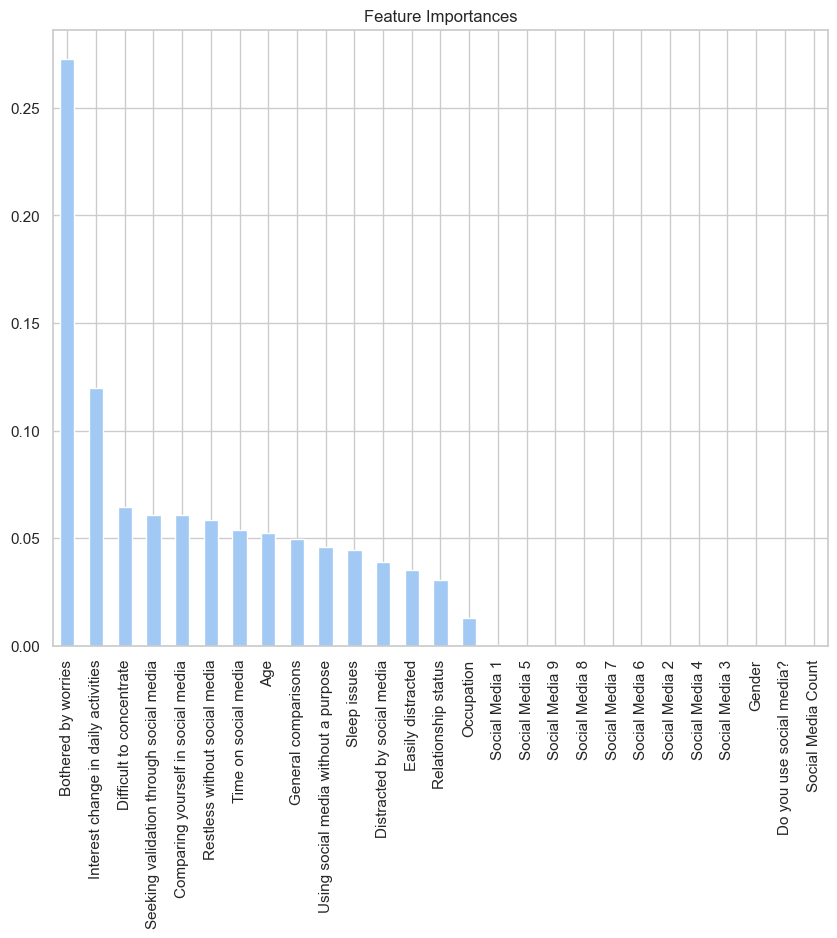

In [25]:
#Creating feature importance plot
rf =RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y_binary)
feat_importances = pd.Series(rf.feature_importances_, index= X.columns)
feat_importances = feat_importances.sort_values(ascending=False)
feat_importances.plot(kind ='bar', figsize=(10,8), title='Feature Importances')
plt.show()

In [26]:
#Creating a "Is depressed" column
df_clean['Is_depressed'] = df_clean['Depressed or down']>= 3

#Grouping the data by gender, and calculating the percentage of depressed people
depression_by_gender = df_clean.groupby('Gender')['Is_depressed'].mean()*100
depression_by_gender

Gender
Female    74.524715
Male      64.454976
Others    85.714286
Name: Is_depressed, dtype: float64

$Extra$ - Creating a chart for depressed levels by Gender.

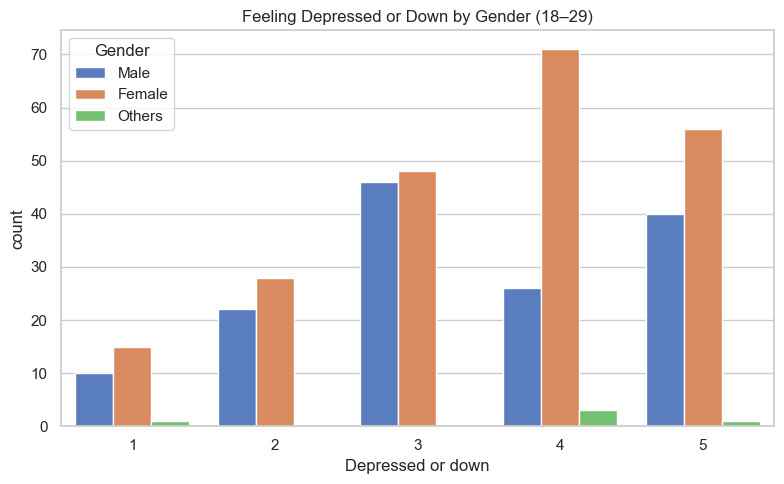

In [27]:
# Gender vs Feeling Down
plt.figure(figsize=(8, 5))
age_filtered = df_clean[df_clean['Age'].between(18, 29)]
sns.countplot(data=age_filtered, x="Depressed or down", hue="Gender",
              palette="muted")
plt.title("Feeling Depressed or Down by Gender (18–29)")
plt.tight_layout()
plt.show()

$Extra$ - Creating an age distribution plot for young females (between 18 and 29)

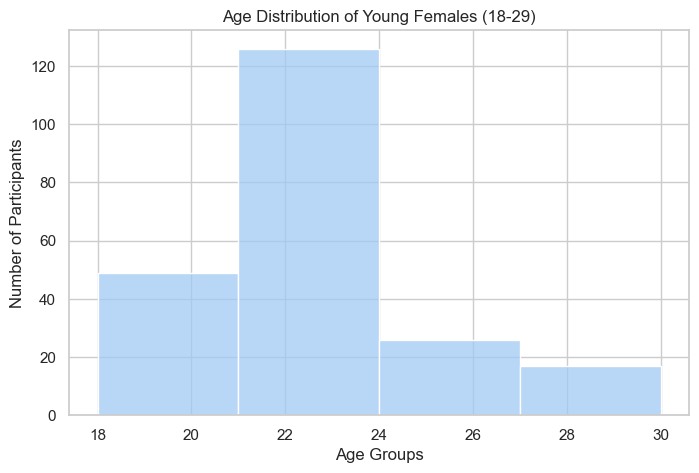

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(data=young_females, x="Age", bins=[18,21,24,27,30], kde=False)
plt.title("Age Distribution of Young Females (18-29)")
plt.xlabel("Age Groups")
plt.ylabel("Number of Participants")
plt.show()

 We are creating a chart to understand the Impact of deoression introduced by Social Media in Young Females 18–29.

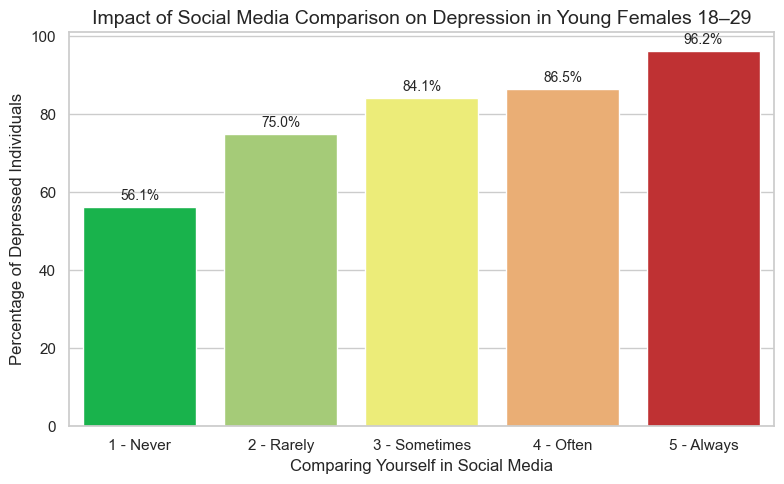

Percentage of Depressed Individuals by Social Media Comparison:
Comparing yourself in social media
1 - Never        56.097561
2 - Rarely       75.000000
3 - Sometimes    84.090909
4 - Often        86.486486
5 - Always       96.153846
Name: Depressed or down, dtype: float64


In [29]:
# Custom color palette: Level 1 (green) to Level 5 (red)
custom_palette = {
    "1 - Never": "#00cc44",      # green
    "2 - Rarely": "#a6d96a",     # light green
    "3 - Sometimes": "#ffff66",  # yellow
    "4 - Often": "#fdae61",      # orange
    "5 - Always": "#d7191c",     # red
}

# Group data by "Comparing yourself in social media" and calculate percentage of "Depressed or down" >= 3
comparison_stats = young_females.groupby('Comparing yourself in social media')['Depressed or down'].apply(lambda x: (x >= 3).mean() * 100)

# Mapping Likert scale values to descriptive labels
labels_map = {
    1: "1 - Never",
    2: "2 - Rarely",
    3: "3 - Sometimes",
    4: "4 - Often",
    5: "5 - Always"
}
comparison_stats.index = comparison_stats.index.map(labels_map)

# Generate colors in correct order based on index
bar_colors = [custom_palette[label] for label in comparison_stats.index]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=comparison_stats.index, y=comparison_stats.values, palette=bar_colors)

# Add labels and title
plt.title("Impact of Social Media Comparison on Depression in Young Females 18–29", fontsize=14)
plt.xlabel("Comparing Yourself in Social Media", fontsize=12)
plt.ylabel("Percentage of Depressed Individuals", fontsize=12)
plt.xticks(rotation=0)

# Annotate bars
for i, v in enumerate(comparison_stats.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Print the statistics
print("Percentage of Depressed Individuals by Social Media Comparison:")
print(comparison_stats)

$Extra$ - we are looking to see a correlation between the time spent on social media and the use without purpose.

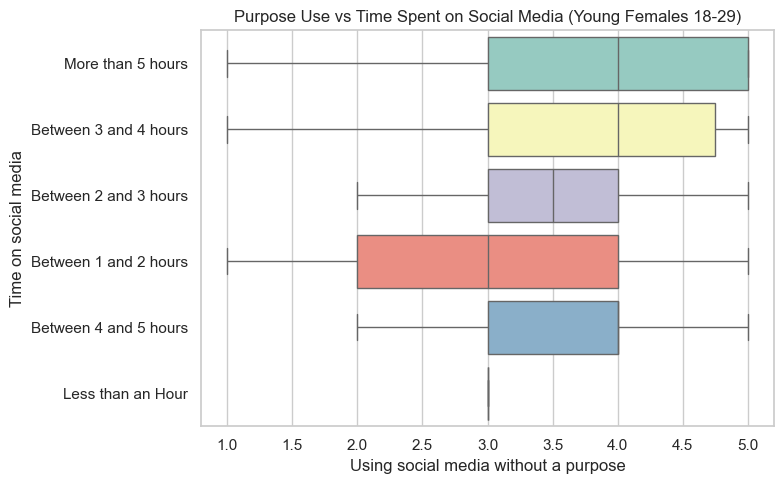

In [30]:
# Usage without purpose vs time
plt.figure(figsize=(8, 5))
sns.boxplot(data=young_females, x="Using social media without a purpose", y="Time on social media",
            palette="Set3")
plt.title("Purpose Use vs Time Spent on Social Media (Young Females 18-29)")
plt.tight_layout()
plt.show()

Creating a column to reflect depression level above 3.

In [31]:
#Creating a "Is depressed" column
df_clean['Is_depressed'] = df_clean['Depressed or down']>= 3

Looking at our young_females_depressed dataset to understand if their relationship status has an impact on depression.

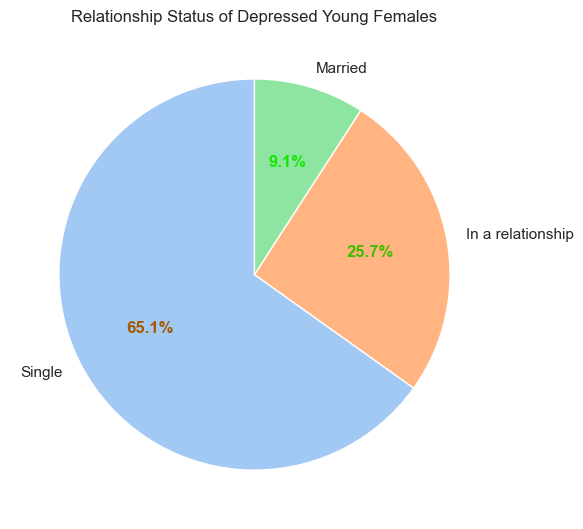

In [32]:
# Value counts
relationship_counts = young_females_depressed['Relationship status'].value_counts()
labels = relationship_counts.index
sizes = relationship_counts.values

# Create pie chart without custom palette
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)

# Color the percentage texts based on their value (green to red)
for autotext in autotexts:
    pct = float(autotext.get_text().strip('%'))
    red = int(255 * pct / 100)
    green = int(255 * (1 - pct / 100))
    color = f'#{red:02x}{green:02x}00'
    autotext.set_color(color)
    autotext.set_fontweight('bold')

plt.title("Relationship Status of Depressed Young Females")
plt.ylabel('')
plt.tight_layout()
plt.show()

Creating a chart, Time on social media vs Depressed or down. We would like to understand if the time on social media has an impact on depression.

In [33]:
young_females["Depressed or down"] = young_females["Depressed or down"].astype(str)

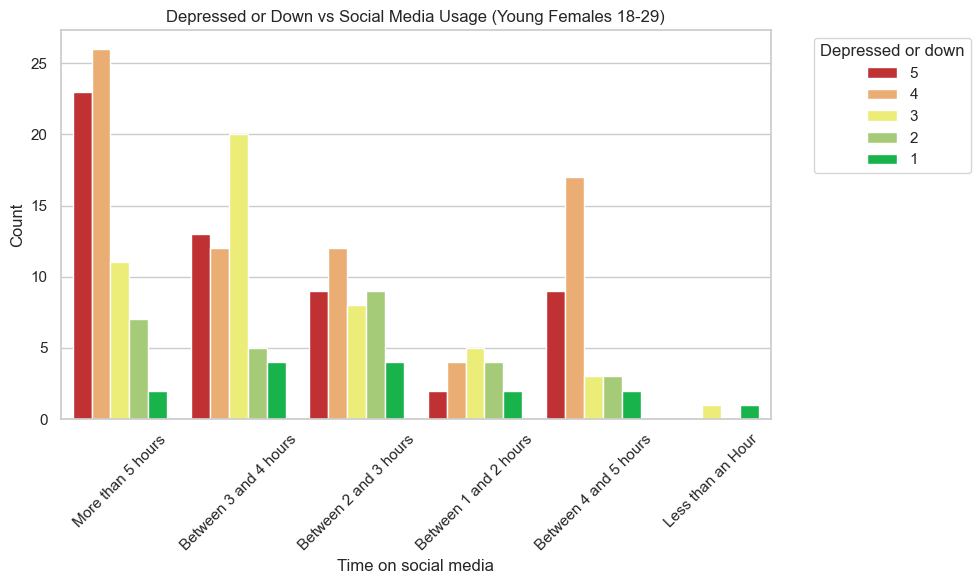

In [34]:
# Custom color palette: Level 1 (green) to Level 5 (red)
custom_palette = {
    "1": "#00cc44",  # green
    "2": "#a6d96a",  # light green
    "3": "#ffff66",  # yellow
    "4": "#fdae61",  # orange
    "5": "#d7191c",  # red
}

plt.figure(figsize=(10, 6))
sns.countplot(data=young_females, x="Time on social media", hue="Depressed or down", palette=custom_palette)

# Adding labels and title
plt.title("Depressed or Down vs Social Media Usage (Young Females 18-29)")
plt.xlabel("Time on social media")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Depressed or down", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

$Extra$ - Creating a correlation matrix with restless, distraction and purpose map in the young_females_depressed dataset to understand the correlations.



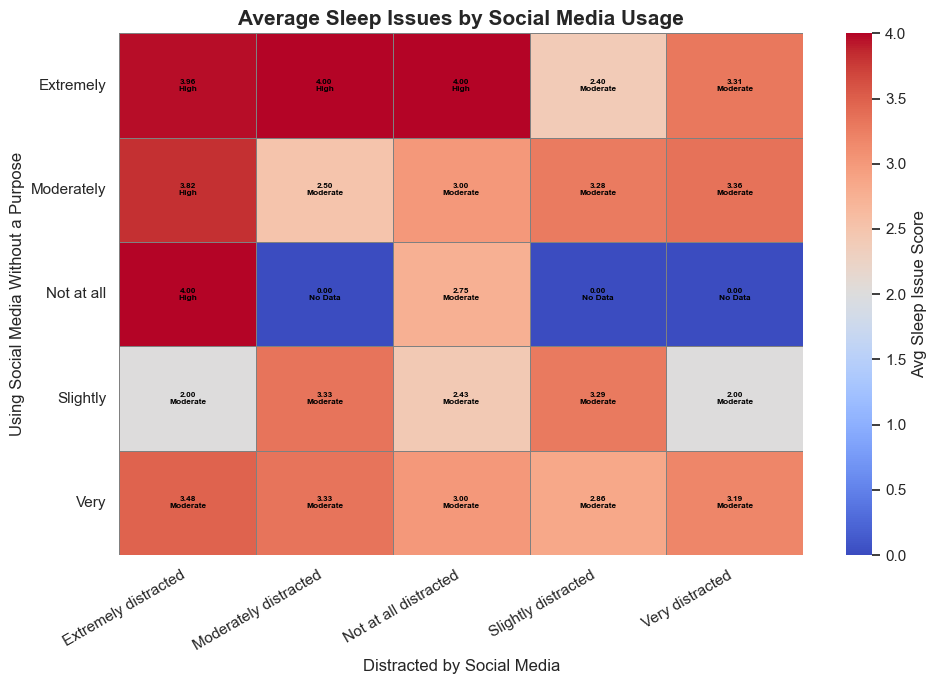

In [35]:
# Define mappings
restless_map = {
    0: 'Not at all',
    1: 'Sometimes',
    2: 'Often',
    3: 'Very often'
}

distraction_map = {
    1: 'Not at all distracted',
    2: 'Slightly distracted',
    3: 'Moderately distracted',
    4: 'Very distracted',
    5: 'Extremely distracted'
}

purpose_map = {
    1: 'Not at all',
    2: 'Slightly',
    3: 'Moderately',
    4: 'Very',
    5: 'Extremely'
}

# Filter young females age 18-29
young_females_depressed = young_females_numerical[
    (young_females_numerical['Age'] >= 18) &
    (young_females_numerical['Age'] <= 29)
].copy()

# Apply mappings
young_females_depressed['Restless without social media'] = young_females_depressed[
    'Restless without social media'].map(restless_map)

young_females_depressed['Distracted by social media'] = young_females_depressed[
    'Distracted by social media'].map(distraction_map)

young_females_depressed['Using social media without a purpose'] = young_females_depressed[
    'Using social media without a purpose'].map(purpose_map)

# Group and average
grouped_data = young_females_depressed.groupby(
    ['Using social media without a purpose', 'Distracted by social media']
)['Sleep issues'].mean().reset_index()

# Pivot to matrix format
pivot_table = grouped_data.pivot_table(
    index='Using social media without a purpose',
    columns='Distracted by social media',
    values='Sleep issues',
    aggfunc='mean'
)

# Fill missing with 0
pivot_table = pivot_table.fillna(0)

# Generate custom annotations with descriptions
def describe_score(value):
    if value == 0:
        return "0.00\nNo Data"
    elif value < 2:
        return f"{value:.2f}\nLow"
    elif value < 3.5:
        return f"{value:.2f}\nModerate"
    else:
        return f"{value:.2f}\nHigh"

annot_labels = pivot_table.applymap(describe_score)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    pivot_table,
    annot=annot_labels,
    fmt='',
    cmap='coolwarm',
    cbar_kws={'label': 'Avg Sleep Issue Score'},
    linewidths=0.5,
    linecolor='gray',
    annot_kws={'size': 6, 'weight': 'bold', 'color': 'black'}
)

# Titles and axis labels
plt.title(
    'Average Sleep Issues by Social Media Usage',
    fontsize=15, fontweight='bold'
)
plt.xlabel('Distracted by Social Media', fontsize=12)
plt.ylabel('Using Social Media Without a Purpose', fontsize=12)

plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Database 2

In [36]:
#Import csv file
df2 = pd.read_csv('test.csv')
df2.head(5)

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral


We will start looking at the dataset. 

In [37]:
#Creating a copy of the dataset
df2_clean = df2.copy()

In [38]:
#Replace non-binary to Others
df2_clean['Gender'] = df2_clean['Gender'].replace({'Non-binary': 'Others'})
df2_clean

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Others,Snapchat,60,1,18,7,12,Neutral
2,776,28,Others,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Others,Facebook,55,3,17,7,12,Neutral
...,...,...,...,...,...,...,...,...,...,...
98,184,22,Male,Twitter,70,1,20,5,22,Neutral
99,896,33,Male,LinkedIn,85,4,35,18,18,Boredom
100,708,24,Others,Facebook,110,6,35,23,25,Sadness
101,993,24,Male,Telegram,75,3,37,16,22,Neutral


In [39]:
#Calculating the percentage of missing values
missing2 = df2_clean.isnull().sum().sort_values(ascending=False)/len(df2)*100
missing2

User_ID                       0.0
Age                           0.0
Gender                        0.0
Platform                      0.0
Daily_Usage_Time (minutes)    0.0
Posts_Per_Day                 0.0
Likes_Received_Per_Day        0.0
Comments_Received_Per_Day     0.0
Messages_Sent_Per_Day         0.0
Dominant_Emotion              0.0
dtype: float64

In [40]:
#Renaming the social media columns
df2_clean['Platform'] = df2_clean['Platform'].replace({'Facebook':'Social Media 1', 'Twitter': 'Social Media 2', 'Instagram':'Social Media 3', 'Youtube':'Social Media 4', 'Snapchat': 'Social Media 5', 'Discord': 'Social Media 6', 'Reddit':'Social Media 7', 'Pinterest':'Social Media 8', 'TikTok':'Social Media 9', 'LinkedIn':'Social Media 10', 'WhatsApp':'Social Media 11', 'Telegram':'Social Media 12', })
df2_clean

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Social Media 5,120,4,40,18,22,Neutral
1,488,21,Others,Social Media 5,60,1,18,7,12,Neutral
2,776,28,Others,Social Media 5,115,3,38,18,27,Anxiety
3,869,27,Male,Social Media 12,105,3,48,20,28,Anxiety
4,573,21,Others,Social Media 1,55,3,17,7,12,Neutral
...,...,...,...,...,...,...,...,...,...,...
98,184,22,Male,Social Media 2,70,1,20,5,22,Neutral
99,896,33,Male,Social Media 10,85,4,35,18,18,Boredom
100,708,24,Others,Social Media 1,110,6,35,23,25,Sadness
101,993,24,Male,Social Media 12,75,3,37,16,22,Neutral


In [41]:
# Convert 'Age' column to numeric
df2_clean['Age'] = pd.to_numeric(df2_clean['Age'], errors='coerce')

# Filter young females aged 18 to 29
df2_young_female = df2_clean[(df2_clean['Age'] >= 18) & (df2_clean['Age'] <= 29) & (df2_clean['Gender'] == 'Female')]
df2_young_female.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27.0,Female,Social Media 5,120,4,40,18,22,Neutral
5,428,25.0,Female,Social Media 3,160,6,85,26,30,Happiness
6,528,25.0,Female,Social Media 3,160,6,85,26,30,Happiness
13,328,25.0,Female,Social Media 3,160,6,85,26,30,Happiness
22,497,22.0,Female,Social Media 1,70,1,14,6,10,Neutral


In [42]:
# Converting 'Daily_Usage_Time (minutes)' from minutes to hours
df2_young_female['Daily_Usage_Time (hours)'] = df2_young_female['Daily_Usage_Time (minutes)'] / 60
df2_young_female.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Daily_Usage_Time (hours)
0,500,27.0,Female,Social Media 5,120,4,40,18,22,Neutral,2.000000
5,428,25.0,Female,Social Media 3,160,6,85,26,30,Happiness,2.666667
6,528,25.0,Female,Social Media 3,160,6,85,26,30,Happiness,2.666667
13,328,25.0,Female,Social Media 3,160,6,85,26,30,Happiness,2.666667
22,497,22.0,Female,Social Media 1,70,1,14,6,10,Neutral,1.166667


In [43]:
#Converting the column to numeric
df2_young_female['Daily_Usage_Time (hours)'] = pd.to_numeric(df2_young_female['Daily_Usage_Time (hours)'], errors='coerce')

In [44]:
#Defining the function to categorize usage
def categorize_usage(x):
    try:
        x = float(x)  # Try to convert to float
    except:
        return x

def categorize_usage(x):
    if 0 <= x < 1:
        return 'Less than an Hour'
    elif 1 <= x < 2:
        return 'Between 1 and 2 hours'
    elif 2 <= x <= 3:
        return 'Between 2 and 3 hours'
    elif 3 < x <= 5:
        return 'Between 3 and 5 hours'
    else:
        return 'More than 5 hours'

df2_young_female['Usage_Category'] = df2_young_female['Daily_Usage_Time (hours)'].apply(categorize_usage)
df2_young_female.head(5)

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Daily_Usage_Time (hours),Usage_Category
0,500,27.0,Female,Social Media 5,120,4,40,18,22,Neutral,2.000000,Between 2 and 3 hours
5,428,25.0,Female,Social Media 3,160,6,85,26,30,Happiness,2.666667,Between 2 and 3 hours
6,528,25.0,Female,Social Media 3,160,6,85,26,30,Happiness,2.666667,Between 2 and 3 hours
13,328,25.0,Female,Social Media 3,160,6,85,26,30,Happiness,2.666667,Between 2 and 3 hours
22,497,22.0,Female,Social Media 1,70,1,14,6,10,Neutral,1.166667,Between 1 and 2 hours


Creating a pie chart to look at the dominant emotion within our dataset.

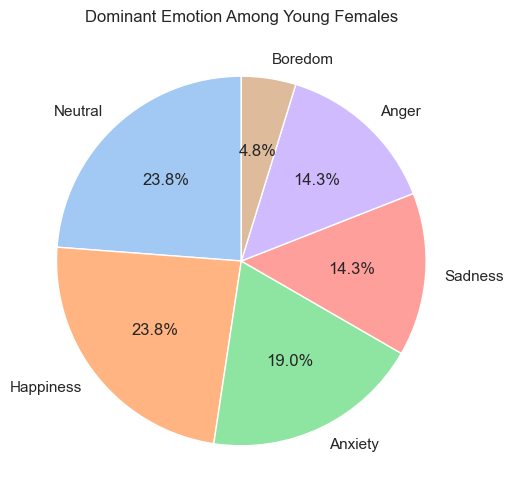

'Neutral'

In [49]:
df2_young_female['Dominant_Emotion'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title("Dominant Emotion Among Young Females")
plt.ylabel('')
plt.show()

'Neutral'

Creating a plot for dominant emotion vs usage category (time spent on social media) for Dataset 2

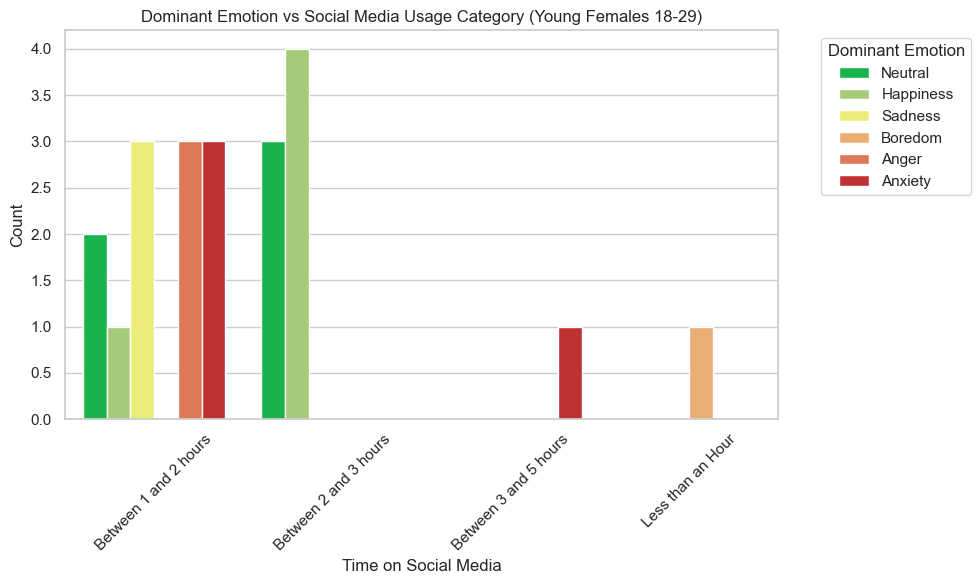

In [46]:
# Custom palette: green (neutral) to red (anxiety)
emotion_palette = {
    "Neutral": "#00cc44",      # green
    "Happiness": "#a6d96a",    # light green
    "Sadness": "#ffff66",      # yellow
    "Boredom": "#fdae61",      # orange
    "Anger": "#f46d43",        # dark orange
    "Anxiety": "#d7191c",      # red
}

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df2_young_female,
    x="Usage_Category",
    hue="Dominant_Emotion",
    palette=emotion_palette,
    order=sorted(df2_young_female["Usage_Category"].unique())  # Optional: sort x-axis
)

# Add labels and title
plt.title("Dominant Emotion vs Social Media Usage Category (Young Females 18-29)")
plt.xlabel("Time on Social Media")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Dominant Emotion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

$Extra$ - Creating one plot to compare overall time spend on social media for dataset 1 and dataset 2

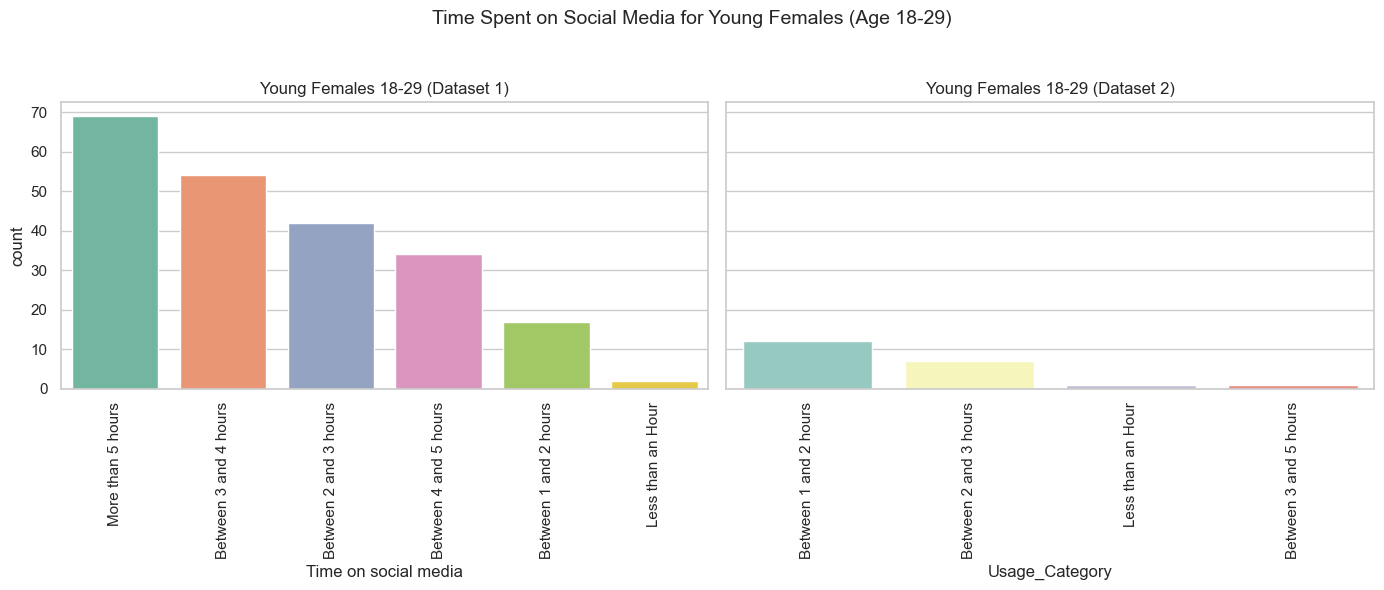

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Young Females
sns.countplot(
    data=young_females,
    x="Time on social media",
    order=young_females["Time on social media"].value_counts().index,
    palette="Set2",
    ax=axes[0]
)
axes[0].set_title("Young Females 18-29 (Dataset 1)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Plot for Young Males
sns.countplot(
    data=df2_young_female,
    x="Usage_Category",
    order=df2_young_female["Usage_Category"].value_counts().index,
    palette="Set3",
    ax=axes[1]
)
axes[1].set_title("Young Females 18-29 (Dataset 2)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

# Final layout
fig.suptitle("Time Spent on Social Media for Young Females (Age 18-29)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()

$Extra$ - Creating a plot to compare time on social media in the two different datasets.

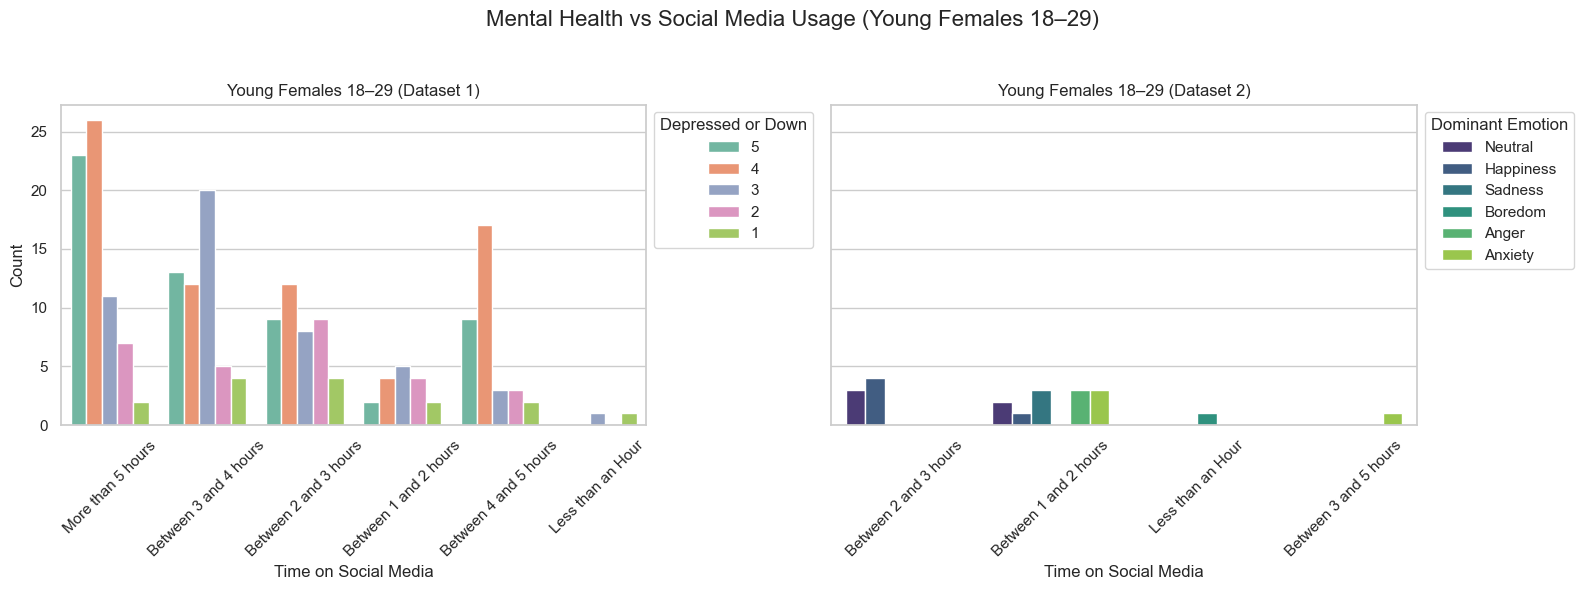

In [48]:
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for Young Females (Dataset 1)
sns.countplot(
    data=young_females,
    x="Time on social media",
    hue="Depressed or down",
    palette="Set2",
    ax=axes[0]
)
axes[0].set_title("Young Females 18–29 (Dataset 1)")
axes[0].set_xlabel("Time on Social Media")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title="Depressed or Down", bbox_to_anchor=(1, 1), loc='upper left')

# Plot for Young Females (Dataset 2)
sns.countplot(
    data=df2_young_female,
    x="Usage_Category",
    hue="Dominant_Emotion",
    palette="viridis",
    ax=axes[1]
)
axes[1].set_title("Young Females 18–29 (Dataset 2)")
axes[1].set_xlabel("Time on Social Media")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title="Dominant Emotion", bbox_to_anchor=(1, 1), loc='upper left')

# Add overall title and layout tweaks
fig.suptitle("Mental Health vs Social Media Usage (Young Females 18–29)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()